In [31]:
%matplotlib inline
import pandas as pd
import geopandas as gp
import numpy as np
import os

from shapely.geometry import Point
from geopandas.tools import sjoin

PARQA = os.getenv('PARQA')

In [32]:
def toGeoDataFrame(df, lat='lat',lon='lon'):
    '''dataframe to geodataframe'''
    df[lat].replace(0, np.nan)
    df[lon].replace(0, np.nan)
    df = df[pd.notnull(df[lat])]

    df['geometry'] = df.apply(lambda z: Point(z[lon], z[lat]), axis=1)
    df = gp.GeoDataFrame(df)
    df.crs = {'init': 'epsg:4326', 'no_defs': True}
    return df

In [38]:

df = pd.read_csv(PARQA + 'data/DPR_property/school_playgrounds.csv', index_col=0)

In [39]:
df.head()

,BOROUGH,LOCATION,PSID,GISPROPNUM,lon,lat
0,Q,Francis Lewis Blvd. bet.ween 192 St. and 35 Ave.,I.S. 25,QS09,-73.789308,40.765013
1,Q,117 St. bet.ween Jamaica Ave. and 89 Ave.,P.S. 51,QS10,-73.831557,40.698129
2,B,E. 2 St. bet.ween Ave. S and Ave. R,P.S. 215,BS30,-73.970225,40.602868
3,B,60 St. bet.ween Bay Pkwy. and 23 Ave.,P.S. 226,BS31,-73.977325,40.615567
4,B,Bergen St. bet.ween Troy Ave. and Schenectady ...,P.S. 243,BS32,-73.934851,40.675514


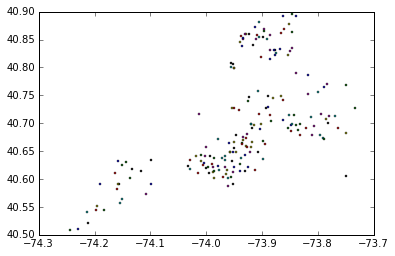

In [40]:
df = toGeoDataFrame(df)
df.plot()

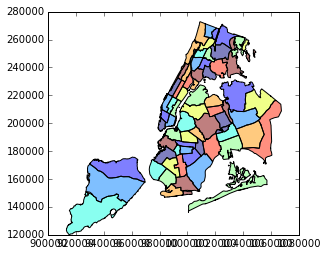

In [41]:
pDistricts = gp.read_file(PARQA + 'data/SHP/Park_Districts/ParkDistrict.shp')
pD = pDistricts[['SYSTEM','geometry']]
pD.plot()

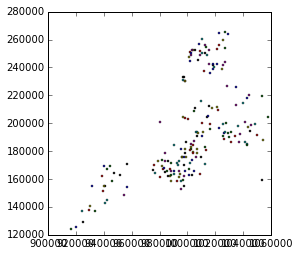

In [42]:
df = df.to_crs(pDistricts.crs)
df.plot()

In [44]:
dfD = sjoin(df, pD, how="left").rename(columns={'SYSTEM':'parkDistrict'}).to_crs(epsg=4326)

In [45]:
def writeGeoJson(gdf,path):
    '''writes df as json'''
    with open(path,'w') as jsFile:
        jsFile.write(gdf.to_json())

In [46]:
writeGeoJson(dfD, PARQA +'data/DPR_property/csv_ll_pD/ps_pd_ll.geojson')